# Analysis of online store 

## Business objective and work plan 

**Objective:**
The main objective of the project is to develop a solution that will personalize offers to loyal customers to increase their purchasing activity.

**Criteria**:

Target attribute - purchase activity. 

**Plan of Work**:
1) Data Loading:
- Import datasets for analysis.
- Import libraries
  
2) Data preprocessing:
- Performing data cleaning to handle omissions and remove duplicates.
- Converting data types as needed.
- Merging datasets

3) Exploratory Data Analysis:
- Correlation analysis

4) Model building and selection of the best model
5) Analyzing the importance of attributes
6) Customer segmentation and development of recommendations
7) Final conclusions


**Datasets:**

**market_file.csv**

contains data on customer behavior on the website, customer communications and product behavior, and target attribute 

**market_money.csv**

contains data about the revenue the store receives from the customer, i.e. how much the customer spent during the period of interaction with the site.

**market_money.csv**

contains data on the time (in minutes) that the customer spent on the site during the period.

**market_money.csv** contains data on the average monthly profit of the customer for the last 3 months: what profit the store gets from sales to each customer.

Translated with DeepL.com (free version)

## Data Upload

In [222]:
!pip install shap


In [223]:
pip install --upgrade ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [224]:
!pip install numpy==1.23

  Using cached numpy-1.23.0.tar.gz (10.7 MB)
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for numpy: filename=numpy-1.23.0-cp311-cp311-macosx_14_0_x86_64.whl size=5714429 sha256=067811668713bede51883349f56e14ac8b84ad58fa5d1f650e00ab0967c13b3e
  Stored in directory: /Users/D063858/Library/Caches/pip/wheels/6d/36/1a/3ec6b85008bea3151efb003f5d41baa7bf4966cb43c1c2470b
Successfully built numpy
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.
pandas 2.1.4 requires numpy<2,>=1.23.2; python_version == "3.11", but you have numpy 1.23.0 which is incompatible.

In [225]:
!pip install phik

  Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp311-cp311-macosx_10_9_x86_64.whl (20.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.23.0
    Uninstalling numpy-1.23.0:
      Successfully uninstalled numpy-1.23.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.0 requires FuzzyTM>=0.4.0, which is not installed.


In [226]:
# import libraries 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import phik

from sklearn.pipeline import Pipeline


import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import (OneHotEncoder,  
                                    OrdinalEncoder,
                                   StandardScaler,
                                   MinMaxScaler, 
                                    LabelEncoder,
                                    PolynomialFeatures
                                    )

from sklearn.model_selection import GridSearchCV

from sklearn.dummy import DummyClassifier

from sklearn.compose import ColumnTransformer

from sklearn.impute import SimpleImputer

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.metrics import (
                mean_squared_error,
                mean_absolute_error,
                r2_score,
                accuracy_score, 
                confusion_matrix,
                 recall_score,
                precision_score,
                 roc_auc_score
             ) 
from sklearn.model_selection import RandomizedSearchCV

import shap

In [227]:
#upload datasets
pth1_market_file = 'market_file.csv'
pth2_market_file = '/datasets/market_file.csv'

pth1_market_money = 'market_money.csv'
pth2_market_money = '/datasets/market_money.csv'

pth1_market_time = 'market_time.csv'
pth2_market_time = '/datasets/market_time.csv'

pth1_money = 'money.csv'
pth2_money = '/datasets/money.csv'

# reading files 
if os.path.exists(pth1_market_file):
    df_market_file = pd.read_csv(pth1_market_file)
elif os.path.exists(pth2_market_file):
    df_market_file = pd.read_csv(pth2_market_file)
else:
    print('Something is wrong with market_file.csv')

if os.path.exists(pth1_market_money):
    df_market_money = pd.read_csv(pth1_market_money)
elif os.path.exists(pth2_market_money):
    df_market_money = pd.read_csv(pth2_market_money)
else:
    print('Something is wrong with market_money.csv')

if os.path.exists(pth1_market_time):
    df_market_time = pd.read_csv(pth1_market_time)
elif os.path.exists(pth2_market_time):
    df_market_time = pd.read_csv(pth2_market_time)
else:
    print('Something is wrong with market_time.csv')

if os.path.exists(pth1_money):
    df_money = pd.read_csv(pth1_money, sep=';', decimal=',')
elif os.path.exists(pth2_money):
    df_money = pd.read_csv(pth2_money, sep=';', decimal=',')
else:
    print('Something is wrong with money.csv')

In [228]:
df_market_file.head(3)

,id,Покупательская активность,Тип сервиса,Разрешить сообщать,Маркет_актив_6_мес,Маркет_актив_тек_мес,Длительность,Акционные_покупки,Популярная_категория,Средний_просмотр_категорий_за_визит,Неоплаченные_продукты_штук_квартал,Ошибка_сервиса,Страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


Format to lower case and rename the columns

In [230]:
df_market_file.columns = df_market_file.columns.str.lower()

In [231]:
df_market_file = df_market_file.rename(columns=
                                     {'покупательская активность': 'покупательская_активность',
                                      'тип сервиса': 'тип_сервиса',
                                      'разрешить сообщать': 'разрешить_сообщать', 
                                      }) 
df_market_file.head(3)

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
0,215348,Снизилась,премиум,да,3.4,5,121,0.00,Товары для детей,6,2,1,5
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5
2,215350,Снизилась,стандартт,нет,4.9,3,539,0.14,Домашний текстиль,5,2,1,5


In [233]:
df_market_money.head(3)

,id,Период,Выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


In [234]:
df_market_money.columns = df_market_money.columns.str.lower()
df_market_money.head(3)

,id,период,выручка
0,215348,препредыдущий_месяц,0.0
1,215348,текущий_месяц,3293.1
2,215348,предыдущий_месяц,0.0


In [235]:
df_market_time.head(3)

,id,Период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10


In [236]:
df_market_time.columns = df_market_time.columns.str.lower()
df_market_time.head(3)

,id,период,минут
0,215348,текущий_месяц,14
1,215348,предыдцщий_месяц,13
2,215349,текущий_месяц,10


In [237]:
df_money.head(3)

,id,Прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


In [238]:
df_money.columns = df_money.columns.str.lower()
df_money.head(3)

,id,прибыль
0,215348,0.98
1,215349,4.16
2,215350,3.13


##  Data preparation

### Preprocessing of df_market_file

In [241]:
df_market_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   id                                   1300 non-null   int64  
 1   покупательская_активность            1300 non-null   object 
 2   тип_сервиса                          1300 non-null   object 
 3   разрешить_сообщать                   1300 non-null   object 
 4   маркет_актив_6_мес                   1300 non-null   float64
 5   маркет_актив_тек_мес                 1300 non-null   int64  
 6   длительность                         1300 non-null   int64  
 7   акционные_покупки                    1300 non-null   float64
 8   популярная_категория                 1300 non-null   object 
 9   средний_просмотр_категорий_за_визит  1300 non-null   int64  
 10  неоплаченные_продукты_штук_квартал   1300 non-null   int64  
 11  ошибка_сервиса                

In [257]:
print(df_market_file.duplicated().sum())

0


In [259]:
df_market_file['покупательская_активность'].value_counts()

покупательская_активность
Прежний уровень    802
Снизилась          498
Name: count, dtype: int64

In [261]:
df_market_file['тип_сервиса'].value_counts()

тип_сервиса
стандарт     914
премиум      376
стандартт     10
Name: count, dtype: int64

In [263]:
df_market_file['тип_сервиса'] = df_market_file['тип_сервиса'].replace({
    'стандартт': 'стандарт'
    })
df_market_file['тип_сервиса'].value_counts()

тип_сервиса
стандарт    924
премиум     376
Name: count, dtype: int64

In [265]:
df_market_file['разрешить_сообщать'].value_counts()

разрешить_сообщать
да     962
нет    338
Name: count, dtype: int64

In [267]:
df_market_file['популярная_категория'].value_counts()

популярная_категория
Товары для детей                        330
Домашний текстиль                       251
Косметика и аксесуары                   223
Техника для красоты и здоровья          184
Мелкая бытовая техника и электроника    174
Кухонная посуда                         138
Name: count, dtype: int64

__Findings:__ 
- there are 1300 observations and 12 features + IDs in the dataset.
- Missing values were not found.
- duplicates were checked. One implicit duplicate of type_service was detected and corrected.

### Preprocessing df_market_money

In [271]:
df_market_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3900 entries, 0 to 3899
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       3900 non-null   int64  
 1   период   3900 non-null   object 
 2   выручка  3900 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 91.5+ KB


In [273]:
print(df_market_money.duplicated().sum())

0


In [275]:
df_market_money['период'].value_counts()

период
препредыдущий_месяц    1300
текущий_месяц          1300
предыдущий_месяц       1300
Name: count, dtype: int64

__Findings:__ 
- there are 3900 observations and 2 traits + ID in the dataset.
- Missing values were not found.
- check for duplicates was performed. One implicit duplicate of a period was detected and corrected.

### Preprocessing df_market_time

In [279]:
df_market_time.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2600 entries, 0 to 2599
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      2600 non-null   int64 
 1   период  2600 non-null   object
 2   минут   2600 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 61.1+ KB


In [281]:
df_market_time['период'].value_counts()

период
текущий_месяц       1300
предыдцщий_месяц    1300
Name: count, dtype: int64

In [283]:
df_market_time['период'] = df_market_time['период'].replace({
    'предыдцщий_месяц': 'предыдущий_месяц'
    })
df_market_time['период'].value_counts()

период
текущий_месяц       1300
предыдущий_месяц    1300
Name: count, dtype: int64

__Findings:__ 
- there are 2600 observations and 2 traits + ID in the dataset.
- Missing values are not detected.
- check for duplicates was performed, no duplicates were found

### Preprocessing of df_money

In [287]:
df_money.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1300 entries, 0 to 1299
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       1300 non-null   int64  
 1   прибыль  1300 non-null   float64
dtypes: float64(1), int64(1)
memory usage: 20.4 KB


__Findings:__ 
- there are 1300 observations and 1 feature + ID in the dataset
- No missing values detected

## Exploratory data analysis

### EDA df_market_file

Let's start by analyzing the quantitative features. Let's look at the general statistical indicators df_market_file

In [293]:
df_market_file.describe()

,id,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит
count,1300.000000,1300.000000,1300.000000,1300.000000,1300.000000,1300.00000,1300.000000,1300.000000,1300.000000
mean,215997.500000,4.253769,4.011538,601.898462,0.319808,3.27000,2.840000,4.185385,8.176923
std,375.421985,1.014814,0.696868,249.856289,0.249843,1.35535,1.971451,1.955298,3.978126
min,215348.000000,0.900000,3.000000,110.000000,0.000000,1.00000,0.000000,0.000000,1.000000
25%,215672.750000,3.700000,4.000000,405.500000,0.170000,2.00000,1.000000,3.000000,5.000000
50%,215997.500000,4.200000,4.000000,606.000000,0.240000,3.00000,3.000000,4.000000,8.000000
75%,216322.250000,4.900000,4.000000,806.000000,0.300000,4.00000,4.000000,6.000000,11.000000
max,216647.000000,6.600000,5.000000,1079.000000,0.990000,6.00000,10.000000,9.000000,20.000000


Next, let's look at categorical features.

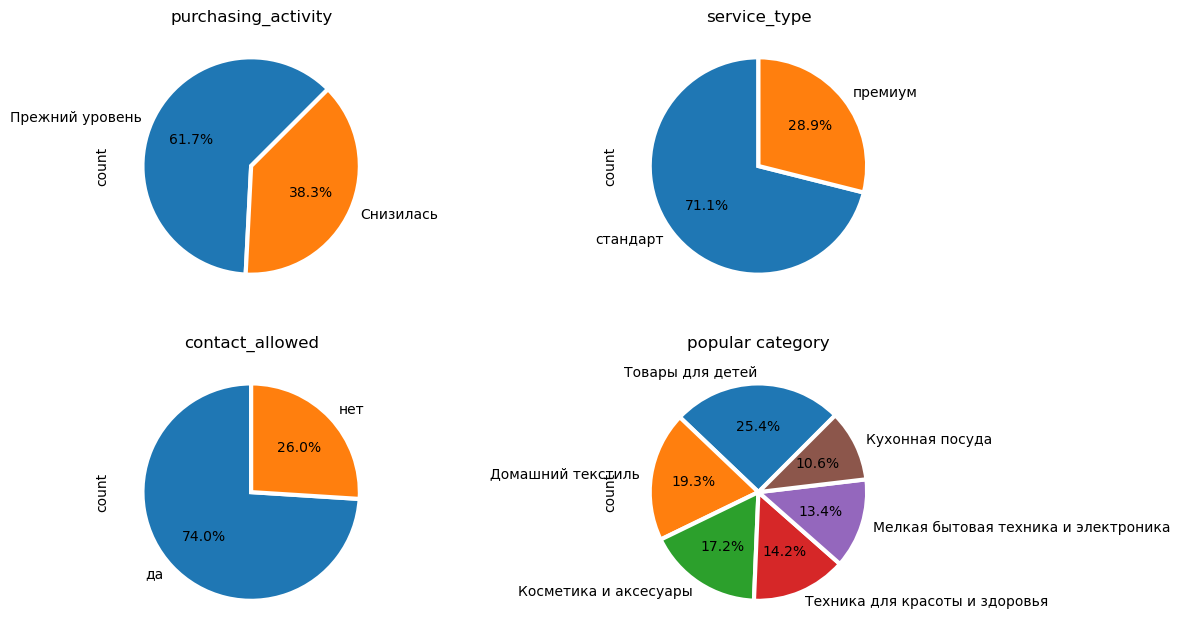

In [296]:
columns = [
    ('покупательская_активность', 'purchasing_activity', 45),
    ('тип_сервиса', 'service_type', 90),
    ('разрешить_сообщать', 'contact_allowed', 90),
    ('популярная_категория', 'popular category', 45)
]

plt.figure(figsize=(12, 12))

for i, (column, title, angle) in enumerate(columns, 1):
    plt.subplot(3, 2, i)
    data = df_market_file[column].value_counts()
    data.plot(kind='pie', autopct='%1.1f%%', startangle=angle, wedgeprops={'linewidth': 3, 'edgecolor': 'white'})
    plt.title(title)

plt.show()

__Conclusion:__ 
- No anomalies were found in the quantitative features
- Categorical data also looks good

### EDA df_market_money

In [300]:
df_market_money.describe()

,id,выручка
count,3900.000000,3900.000000
mean,215997.500000,5025.696051
std,375.325686,1777.704104
min,215348.000000,0.000000
25%,215672.750000,4590.150000
50%,215997.500000,4957.500000
75%,216322.250000,5363.000000
max,216647.000000,106862.200000


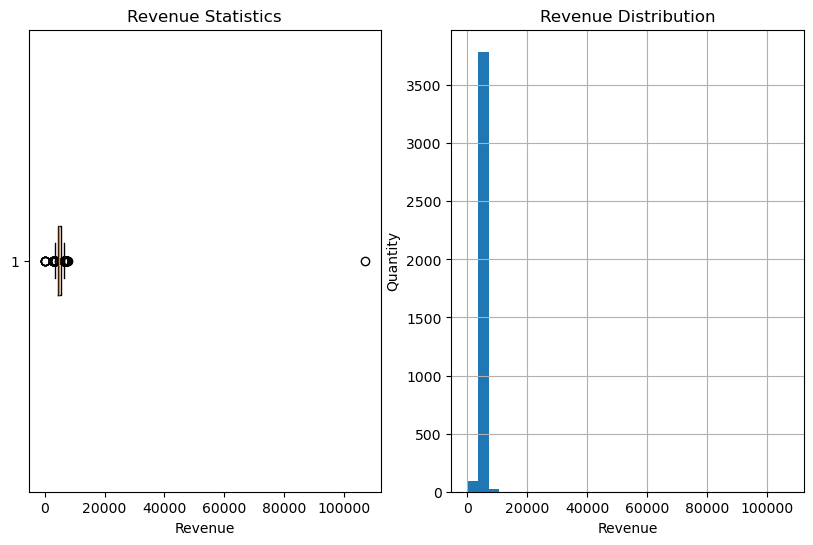

In [302]:
plt.figure(figsize=(10,6))
plt.subplot(1, 2, 1)
plt.boxplot(df_market_money['выручка'], vert=False)  
plt.xlabel('Revenue')
plt.title('Revenue Statistics')


plt.subplot(1, 2, 2)
df_market_money['выручка'].hist(bins=30)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.show()

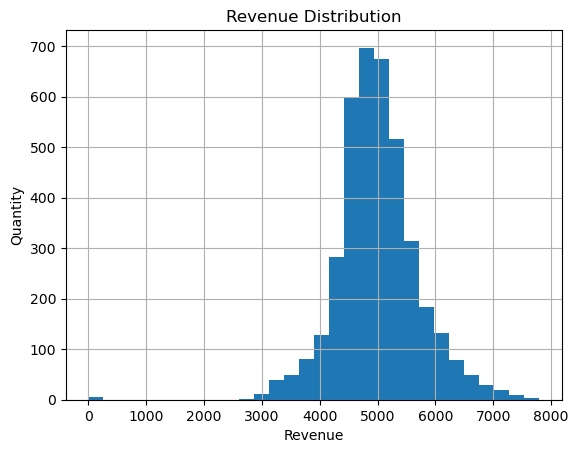

In [304]:
# calculate mean not considering for outliers  
mean_value = df_market_money[(df_market_money['выручка'] <= 80000)]['выручка'].mean()
# replace outlier with feature mean value
df_market_money['выручка'] = df_market_money['выручка'].apply(lambda x: mean_value if x > 80000 else x)

df_market_money['выручка'].hist(bins=30)
plt.title('Revenue Distribution')
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.show()

__Conclusion:__ 
- outliers were detected in the df_market_money dataset and replaced with the mean value

### EDA df_market_time

In [308]:
df_market_time.describe()

,id,минут
count,2600.000000,2600.000000
mean,215997.500000,13.336154
std,375.349754,4.080198
min,215348.000000,4.000000
25%,215672.750000,10.000000
50%,215997.500000,13.000000
75%,216322.250000,16.000000
max,216647.000000,23.000000


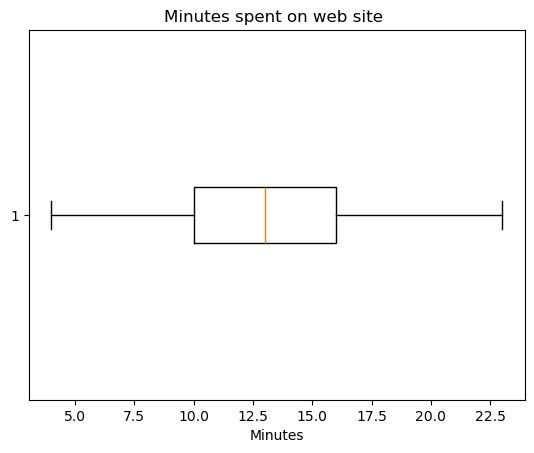

In [310]:
plt.boxplot(df_market_time['минут'], vert=False)  
plt.xlabel('Minutes')
plt.title('Minutes spent on web site ')
plt.show()

__Conclusion:__ 
- no anomalies detected in the df_market_time dataset 

### EDA df_money

In [314]:
df_money.describe()

,id,прибыль
count,1300.000000,1300.000000
mean,215997.500000,3.996631
std,375.421985,1.013722
min,215348.000000,0.860000
25%,215672.750000,3.300000
50%,215997.500000,4.045000
75%,216322.250000,4.670000
max,216647.000000,7.430000


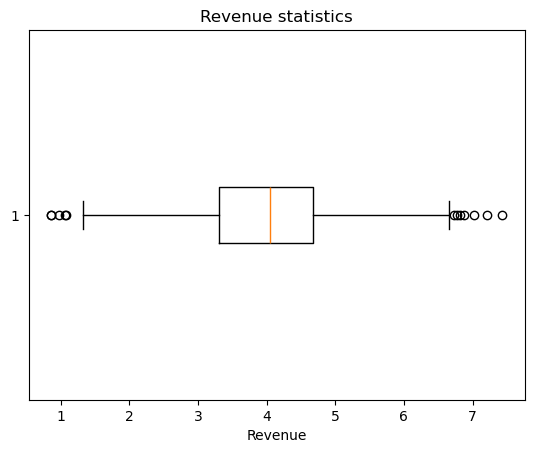

In [316]:
plt.boxplot(df_money['прибыль'], vert=False)  
plt.xlabel('Revenue')
plt.title('Revenue statistics')
plt.show()

__ Conclusion:__ 
- Revenue in the df_money and the df_market_money has different rounding 

### Customers with purchasing activity

Let's select customers with purchasing activity for at least three months, meaning those who have made a purchase during this period.

In [321]:
print(df_market_money.shape)

(3900, 3)


In [323]:
df_pivot = df_market_money.pivot_table(index='id', columns='период', values='выручка')
display(df_pivot.shape)
df_filtered = df_pivot[((df_pivot['текущий_месяц'] == 0)) |
                      ((df_pivot['предыдущий_месяц'] == 0)) |
                      ((df_pivot['препредыдущий_месяц'] == 0))]
display(df_filtered.shape)

(1300, 3)

(3, 3)

Three customers with low purchasing power have been identified; let's remove them from the dataset.

In [326]:
to_delete = df_filtered.index
df_market_money = df_market_money[~df_market_money['id'].isin(to_delete)]
print(df_market_money.shape)

(3891, 3)


**Conclusion:**

- Anomalies have been corrected.
- Three inactive users have been removed.

## Merging tables

Merging the tables:  market_file.csv, market_money.csv, market_time.csv. 

In [331]:
df_market = df_market_file.merge(df_market_money, on = 'id', suffixes=('','_money')).merge(df_market_time, on = 'id', suffixes=('','_time'))
display(df_market.head(3))

,id,покупательская_активность,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,неоплаченные_продукты_штук_квартал,ошибка_сервиса,страниц_за_визит,период,выручка,период_time,минут
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,препредыдущий_месяц,4472.0,текущий_месяц,10
1,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,препредыдущий_месяц,4472.0,предыдущий_месяц,12
2,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,4,2,5,текущий_месяц,4971.6,текущий_месяц,10


In [333]:
# group by id revenue and time per period
df_piv_profit = df_market.pivot_table(index = 'id', columns = 'период', values = 'выручка',  aggfunc='first')
df_piv_time = df_market.pivot_table(index = 'id', columns = 'период_time',values = 'минут', aggfunc = 'first') 
print(df_piv_time)

период_time  предыдущий_месяц  текущий_месяц
id                                          
215349                     12             10
215350                      8             13
215351                     11             13
215352                      8             11
215353                     10             10
...                       ...            ...
216643                     14              7
216644                     12             11
216645                     12             18
216646                     18              7
216647                     15             10

[1297 rows x 2 columns]


In [335]:
#переименуем колонки
df_piv_profit.columns = ['выручка_предыдущий_месяц', 'выручка_предпредыдущий_месяц','выручка_текущий_месяц']
df_piv_time.columns = [ 'минут_предыдущий_месяц', 'минут_текущий_месяц']
print(df_piv_profit)
print(df_piv_time)

        выручка_предыдущий_месяц  выручка_предпредыдущий_месяц  \
id                                                               
215349                    5216.0                        4472.0   
215350                    5457.5                        4826.0   
215351                    6158.0                        4793.0   
215352                    5807.5                        4594.0   
215353                    4738.5                        5124.0   
...                          ...                           ...   
216643                    3664.0                        4704.0   
216644                    4729.0                        5299.0   
216645                    5160.0                        5334.0   
216646                    4923.0                        4725.0   
216647                    4720.0                        5183.0   

        выручка_текущий_месяц  
id                             
215349                 4971.6  
215350                 5058.4  
215351       

In [337]:
df_final = df_market_file.merge(df_piv_profit, on='id').merge(df_piv_time, on='id')
df_final.shape

(1297, 18)

## Correlation analysis

Let's start by examining the interaction between features.  
We will create a correlation matrix between the features. 

In [341]:
df_final = df_final.set_index('id')

/opt/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable выручка_предыдущий_месяц is large: 1121. Are you sure this is not an interval variable? Analysis for pairs of variables including выручка_предыдущий_месяц can be slow.
  warnings.warn(
/opt/anaconda3/lib/python3.11/site-packages/phik/data_quality.py:59: UserWarning: The number of unique values of variable выручка_текущий_месяц is large: 1239. Are you sure this is not an interval variable? Analysis for pairs of variables including выручка_текущий_месяц can be slow.
  warnings.warn(


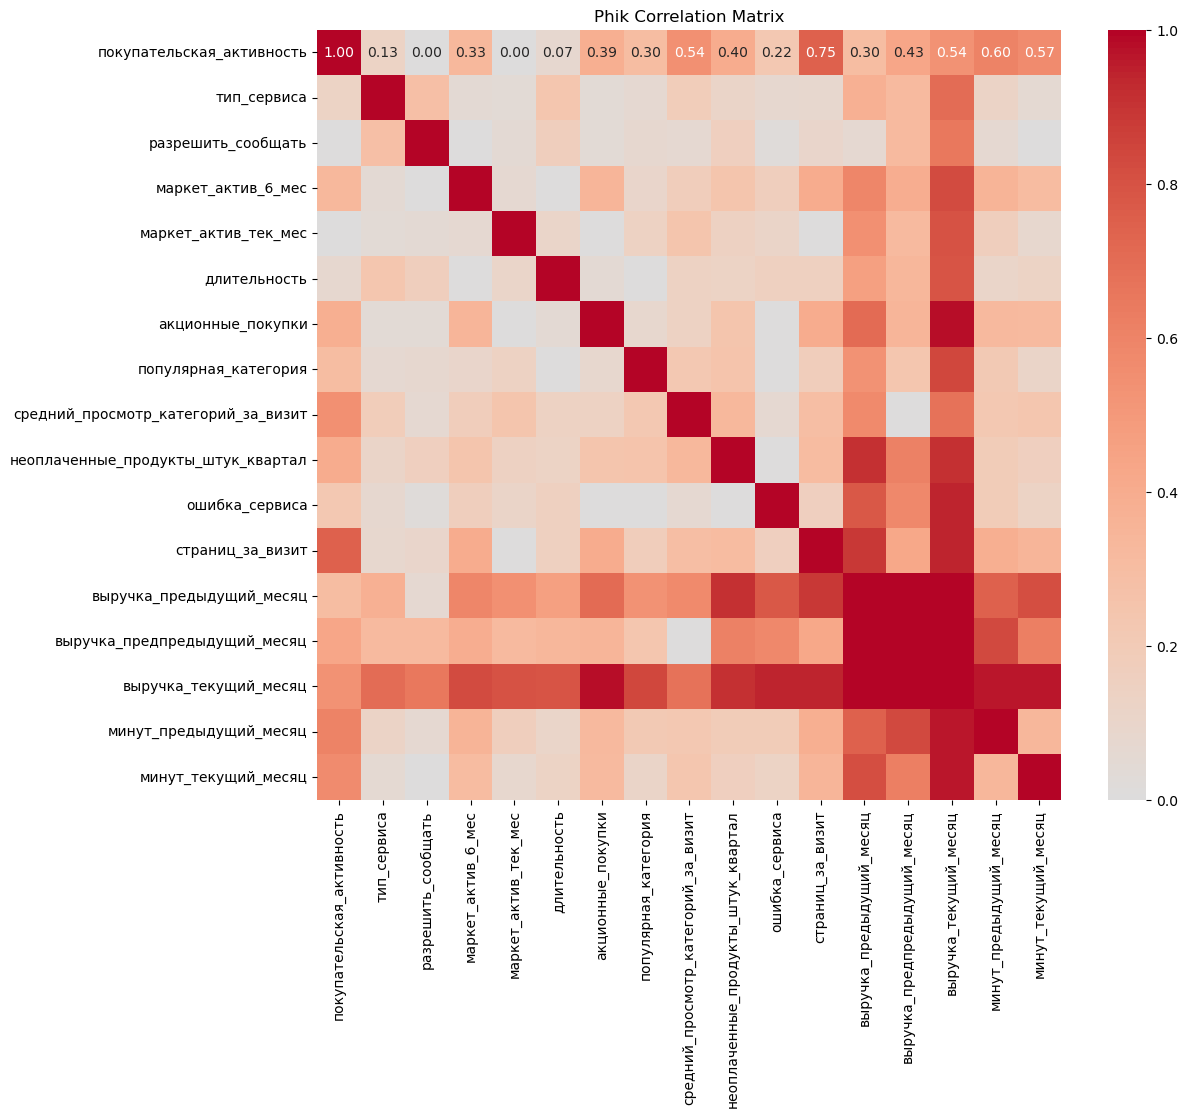

In [343]:
interval_cols = ['маркет_актив_6_мес', 'длительность', 'акционные_покупки', 
                 'выручка_за_предпредыдущий_месяц', 'выручка_за_предыдущий_месяц', 'выручка_за_текущий_месяц']

# Определяем количество бинов для интервальных переменных
bins = {
    'маркет_актив_6_мес': 5,
    'длительность': 5,
    'акционные_покупки': 5,
    'выручка_за_предпредыдущий_месяц': 5,
    'выручка_за_предыдущий_месяц': 5,
    'выручка_за_текущий_месяц': 5
}

# Вычисление phik корреляционной матрицы
phik_matrix = df_final.phik_matrix(interval_cols=interval_cols, bins=bins)

# визуализировать матрицу корреляций
plt.figure(figsize=(12, 10))
sns.heatmap(phik_matrix, cmap='coolwarm', center=0, annot=True, fmt=".2f")
plt.title("Phik Correlation Matrix")
plt.show()

In [344]:
quantitative_features = ['маркет_актив_6_мес', 'маркет_актив_тек_мес', 'выручка_предпредыдущий_месяц','длительность', 'акционные_покупки', 'средний_просмотр_категорий_за_визит', 'неоплаченные_продукты_штук_квартал', 'ошибка_сервиса', 'страниц_за_визит', 'выручка_текущий_месяц', 'выручка_предыдущий_месяц', 'минут_текущий_месяц', 'минут_предыдущий_месяц']
vif_data = df_final[quantitative_features]
vif_data = vif_data.assign(const=1)
vif = pd.DataFrame({
    'feature': quantitative_features,
    'VIF': [variance_inflation_factor(vif_data.values, i) for i in range(len(quantitative_features))]})
display(vif)



,feature,VIF
0,маркет_актив_6_мес,1.222024
1,маркет_актив_тек_мес,1.044482
2,выручка_предпредыдущий_месяц,1.612463
3,длительность,1.099467
4,акционные_покупки,1.186329
5,средний_просмотр_категорий_за_визит,1.178637
6,неоплаченные_продукты_штук_квартал,1.198188
7,ошибка_сервиса,1.079304
8,страниц_за_визит,1.417234
9,выручка_текущий_месяц,3.872051


__Conclusion:__  
**Multicollinearity**  
- High multicollinearity was detected between the feature "revenue_current_month" and other features according to the phik matrix (>0.8).
- This is also observable in the VIF factor (3.8).
- To avoid multicollinearity, the "revenue_current_month" feature can be excluded from the model selection process.

## Pipeline creation 


At this stage, we will take the following steps:
1) Split the dataset into training and testing sets. The target variable is "purchasing_activity."
2) Process numerical and categorical features in a pipeline:
   - For numerical features, we will use StandardScaler() and MinMaxScaler().
   - For categorical features, we will use OneHotEncoder.
   - For the target variable, we will use LabelEncoder.
3) Prepare the final pipeline and a dictionary for four models, which will include hyperparameters for:
   - KNeighborsClassifier()
   - DecisionTreeClassifier()
   - LogisticRegression()
   - SVC()
4) We will use ROC AUC as the metric because it allows us to determine the best ROC curve for binary classification of objects.
   - The ROC curve displays the relationship between the True Positive Rate and the False Positive Rate, allowing us to assess how well the model distinguishes between classes 0 and 1, considering different thresholds.
   - A significant advantage of this metric is that it evaluates model quality across different classification thresholds, making it more general and effective.
   - It takes into account False Positive (Type I) and False Negative (Type II) errors.



In [348]:
RANDOM_STATE = 42
TEST_SIZE = 0.25


X = df_final.drop(['покупательская_активность', 'выручка_текущий_месяц'], axis=1)
y = df_final['покупательская_активность']

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size = TEST_SIZE, 
    random_state = RANDOM_STATE,
    stratify = y
)

In [349]:
# encode targer feature  
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

In [354]:
#categorical features
ohe_columns = [  
    'популярная_категория'
]

In [356]:
#ordinal features 
ord_columns = [
    'тип_сервиса', 'разрешить_сообщать' 
]

In [358]:
#numeric featurs 
num_columns = ['маркет_актив_6_мес', 
               'маркет_актив_тек_мес',
               'длительность', 
               'акционные_покупки', 
               'средний_просмотр_категорий_за_визит',
               'неоплаченные_продукты_штук_квартал',
                'ошибка_сервиса',
               'страниц_за_визит', 
               'выручка_предыдущий_месяц',
                'выручка_предпредыдущий_месяц',
               'минут_предыдущий_месяц',
               'минут_текущий_месяц'
               ] 

In [360]:
# create pipeline to prepare features from ohe_columns
ohe_pipe = Pipeline(
    [
        (
            'simpleImputer_ohe', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (
            'ohe', 
            OneHotEncoder(drop='first', handle_unknown='ignore', sparse_output=False)
        ), 
        
    ]
) 
# create pipeline to prepare features from  ord_columns
ord_pipe = Pipeline(
    [
        (
            'simpleImputer_before_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        ),
        (  'ord',  
            OrdinalEncoder(
                categories=[
                    ['стандарт', 'премиум'], 
                    ['нет', 'да'],
                ], 
                handle_unknown='use_encoded_value', unknown_value=np.nan
            )
        ),
        (
            'simpleImputer_after_ord', 
            SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        )
    ]
) 
# create pipeline to prepare features from  num_columns
num_preprocessor_standard = Pipeline([
    ('simpleImputer_num', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

num_preprocessor_minmax = Pipeline([
    ('simpleImputer_num', SimpleImputer(strategy='mean')),
    ('scaler', MinMaxScaler())
])

# create data preprocessing pipeline 
data_preprocessor = ColumnTransformer(
    [
        ('ohe', ohe_pipe, ohe_columns),
        ('ord', ord_pipe, ord_columns),
        ('num', StandardScaler(), num_columns)
    ], 
    remainder='passthrough'
) 


# final pipeline: data preprocessing and model 
pipe_final = Pipeline(
    [
        ('preprocessor', data_preprocessor),
        ('models', DecisionTreeClassifier(random_state=RANDOM_STATE))
    ]
)

param_grid = [
    # grid for DecisionTreeClassifier()
    {
        'models': [DecisionTreeClassifier(random_state=RANDOM_STATE)],
        'models__max_depth': range(2, 7),
        'models__max_features': range(2, 8),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    },
    
    # grid for KNeighborsClassifier() 
    {
        'models': [KNeighborsClassifier()],
        'models__n_neighbors': range(2, 7),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']   
    },

    # grid for LogisticRegression()
    {
        'models': [LogisticRegression(
            random_state=RANDOM_STATE, 
            solver='liblinear'
        )],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  
    }, 
    # grid for SVC()
    {
        'models': [SVC(random_state=RANDOM_STATE, probability=True)],
        'models__C': range(1, 5),
        'preprocessor__num': [StandardScaler(), MinMaxScaler(), 'passthrough']  

    }
]

In [362]:
randomized_search = RandomizedSearchCV(
    pipe_final, 
    param_grid, 
    cv=5,
    scoring='roc_auc',
    random_state=RANDOM_STATE,
    n_jobs=-1
)

In [364]:
# create and train DummyClassifier
clf_dummy = DummyClassifier(strategy="most_frequent")
clf_dummy.fit(X_train, y_train)

# test model on test data
score = clf_dummy.score(X_test, y_test)

print(f'Dummy Classifier Score: {score}')

Dummy Classifier Score: 0.6184615384615385


We will use a `DummyClassifier` to establish a reference point with an ROC AUC score of 0.6. This means that our model should not perform worse than this baseline metric.

In [367]:
randomized_search.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('preprocessor',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('ohe',
                                                                               Pipeline(steps=[('simpleImputer_ohe',
                                                                                                SimpleImputer(strategy='most_frequent')),
                                                                                               ('ohe',
                                                                                                OneHotEncoder(drop='first',
                                                                                                              handle_unknown='ignore',
                                                                                                              sparse_output=False))]),
                                                                               ['популярная_категория']),
                                                                              ('ord',
                                                                               Pipeline(steps=[('simpleImpu...
                                                               'passthrough']},
                                        {'models': [LogisticRegression(C=4,
                                                                       random_state=42,
                                                                       solver='liblinear')],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']},
                                        {'models': [SVC(probability=True,
                                                        random_state=42)],
                                         'models__C': range(1, 5),
                                         'preprocessor__num': [StandardScaler(),
                                                               MinMaxScaler(),
                                                               'passthrough']}],
                   random_state=42, scoring='roc_auc')

In [368]:
print('Best model and its parameters:\n\n', randomized_search.best_estimator_) 

Best model and its parameters:

 Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('ohe',
                                                  Pipeline(steps=[('simpleImputer_ohe',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('ohe',
                                                                   OneHotEncoder(drop='first',
                                                                                 handle_unknown='ignore',
                                                                                 sparse_output=False))]),
                                                  ['популярная_категория']),
                                                 ('ord',
                                                  Pipeline(steps=[('simpleImputer_before_ord',
          

In [369]:
print('ROC-AUC metric for the best model:\n', randomized_search.best_score_)

ROC-AUC metric for the best model:
 0.8981188965825331


In [370]:
result = pd.DataFrame(randomized_search.cv_results_)
print(result[
    ['rank_test_score', 'param_models', 'mean_test_score','params']
].sort_values('rank_test_score'))


   rank_test_score                                       param_models  \
4                1  LogisticRegression(C=4, random_state=42, solve...   
7                2  LogisticRegression(C=4, random_state=42, solve...   
3                3            DecisionTreeClassifier(random_state=42)   
0                4            DecisionTreeClassifier(random_state=42)   
5                5            DecisionTreeClassifier(random_state=42)   
1                6            DecisionTreeClassifier(random_state=42)   
9                7            DecisionTreeClassifier(random_state=42)   
8                8            DecisionTreeClassifier(random_state=42)   
6                9            DecisionTreeClassifier(random_state=42)   
2               10            DecisionTreeClassifier(random_state=42)   

   mean_test_score                                             params  
4         0.898119  {'preprocessor__num': StandardScaler(), 'model...  
7         0.897960  {'preprocessor__num': StandardSc

__Conclusion:__ 
- As a result of the tests, the best model identified was Logistic Regression.
- The metric indicates a strong performance with a score of 0.89.

Check standard deviation

In [377]:
best_index = randomized_search.best_index_
std_test_score = randomized_search.cv_results_['std_test_score'][best_index]
print(std_test_score)

0.022156520440985854


A small standard deviation of 0.2 indicates the model's stability.

In [380]:
# save the best model 
best_model = randomized_search.best_estimator_
#predict on test data
y_test_proba = best_model.predict_proba(X_test)[:, 1]

#metric
roc_auc = roc_auc_score(y_test, y_test_proba)
print(f'ROC AUC Score: {roc_auc:.2f}')

ROC AUC Score: 0.92


This metric also exceeds that of the Dummy model, indicating that the model tuning was successful.

Let's check the class distribution using the **confusion matrix**.

In [384]:
y_test_pred = best_model.predict(X_test)

# create confusion matrix 
cm = confusion_matrix(y_test, y_test_pred)

# convert  to DataFrame 
cm_df = pd.DataFrame(cm, index=np.unique(y_test), columns=np.unique(y_test))

print("Confusion Matrix:")
print(cm_df)

Confusion Matrix:
                 Прежний уровень  Снизилась
Прежний уровень              189         12
Снизилась                     21        103


The confusion matrix allows us to see how the best model distributes objects across classes:
- 189 times, the model correctly predicted that the level of purchasing activity would remain the same.
- 103 times, it correctly predicted that the level of purchasing activity would decrease.
- 12 times, the model predicted that the level would remain the same, but it actually decreased (Type I error).
- 21 times, it predicted that the level would decrease, but it remained the same (Type II error).

This analysis shows that the model performs well in classification.

## Feature importance analysis

Let's evaluate feature importance for the best model and create a feature importance plot using the SHAP method.

In [389]:
print(randomized_search.best_estimator_.named_steps)

{'preprocessor': ColumnTransformer(remainder='passthrough',
                  transformers=[('ohe',
                                 Pipeline(steps=[('simpleImputer_ohe',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ohe',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore',
                                                                sparse_output=False))]),
                                 ['популярная_категория']),
                                ('ord',
                                 Pipeline(steps=[('simpleImputer_before_ord',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('ord',
                                                  Or...
                                 ['тип_се

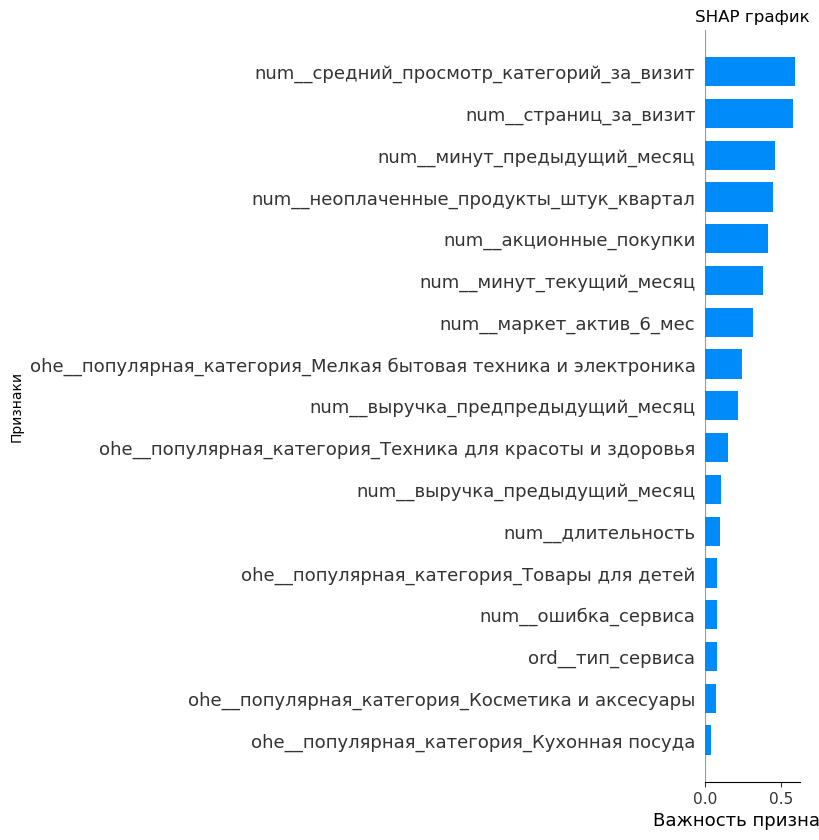

In [391]:
# save the steps in to the variables 
model = randomized_search.best_estimator_.named_steps['models']
preprocessor = randomized_search.best_estimator_.named_steps['preprocessor']

# обработаем тренировочный и тестовый сет используя пайплайн 
X_train_preprocessed = preprocessor.transform(X_train)
X_test_preprocessed = preprocessor.transform(X_test)

# initiate SHAP for logistic regression 
explainer = shap.LinearExplainer(model, X_train_preprocessed)
shap_values = explainer.shap_values(X_test_preprocessed)

# create SHAP visalozation for feature importance 
fig, ax = plt.subplots(figsize=(10, 6))
shap.summary_plot(shap_values, X_test_preprocessed, 
                  feature_names=preprocessor.get_feature_names_out(), 
                  plot_type="bar", max_display=17, show=False)
ax.set_title("SHAP график")
ax.set_xlabel("Важность признаков")
ax.set_ylabel("Признаки")
plt.show()

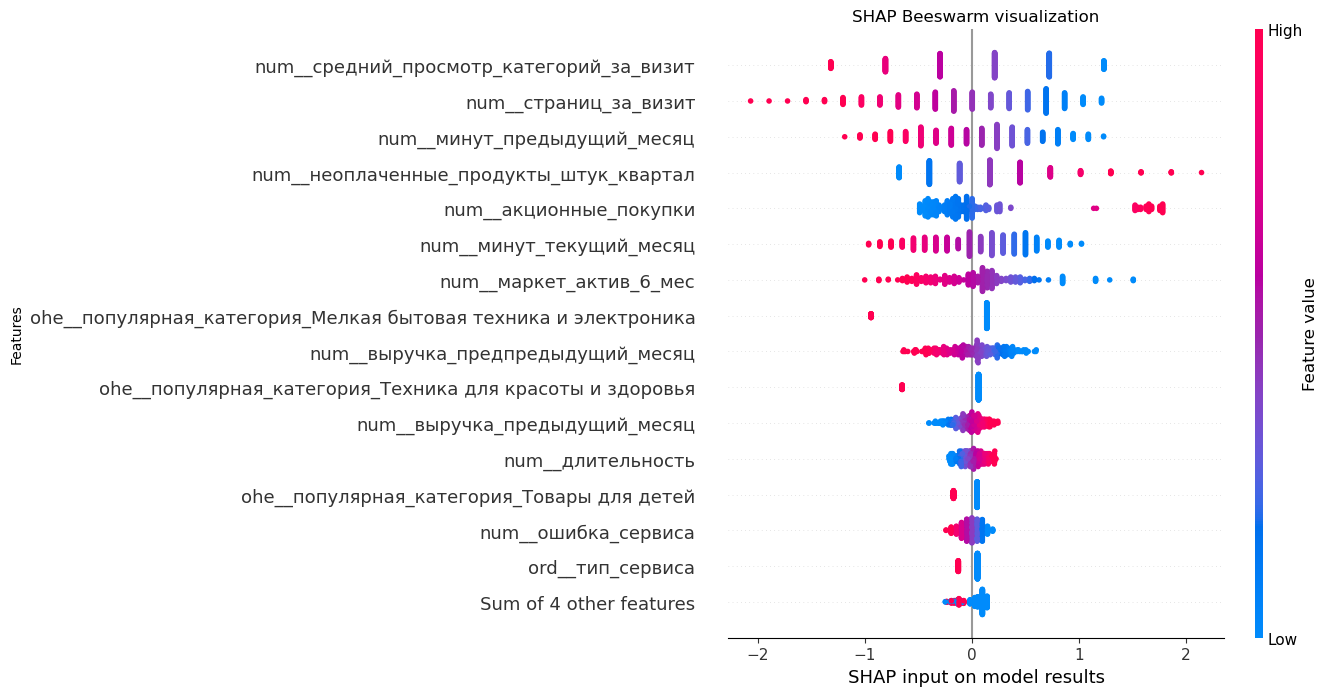

In [393]:
explanation_object = shap.Explanation(values=shap_values, 
                                      base_values=explainer.expected_value, 
                                      data=X_test_preprocessed, 
                                      feature_names=preprocessor.get_feature_names_out())

# создаем SHAP beeswarm график
fig, ax = plt.subplots(figsize=(10, 6))
shap.plots.beeswarm(explanation_object, max_display=16, show=False)
ax.set_title("SHAP Beeswarm visualization")
ax.set_xlabel("SHAP input on model results")
ax.set_ylabel("Features")
plt.show()


__Conclusion:__

*The most important features* are:
- Average category views per visit (product behavior)
- Number of pages visited per visit (website behavior)
- Minutes spent on the site in the previous month (website behavior)
- Number of unpaid products (product behavior)
- Promotional purchases (product behavior)

*Less significant features* include:
- Popular category (product behavior)
- Service type (customer communication)
- Service error
- Revenue from the previous month (financial behavior)
- Duration (time since customer registration on the site) (customer communication)

__SHAP Beeswarm Analysis:__
- Purchase activity is the target feature.
- Class 1 - 'Decreased,' Class 0 - 'Remained the same.'
- Analyzing the SHAP beeswarm plot, we can observe that the most influential features (average category views per visit, number of pages visited per visit, minutes spent on the site in the previous month) tend to lead the model to classify objects as class 0, meaning that the purchase activity remained the same.

__Model Improvement:__

- Less significant features can be excluded from the model, for example, using the *filtering* method.
- Logistic regression captures only linear dependencies, so it can be improved by adding *polynomial features* through polynomial expansion to the feature description.
- Apply *regularization* to reduce the risk of model overfitting.

__Business Decisions:__
- Website behavior contributes the most to the model's prediction, indicating that these factors greatly influence purchase activity. A possible recommendation here would be to create promotional banners on the website, improve navigation, or enhance the user interface.
- Product behavior is also important. It is evident that certain categories are frequently viewed by customers, so focusing on these through discounts could be beneficial. Additionally, attention should be given to unpaid products. It may be worth offering discounts on these items.

## Customers Segmentation

### Segmentation

In [398]:
model_res = pd.DataFrame({
    'id': X_test.index,
    'покупательская_активность': y_test_pred
})

In [400]:
model_res = model_res.reset_index(drop=True)

In [402]:
merged_df = model_res.merge(df_money, on='id')

In [404]:
merged_df.head(2)

,id,покупательская_активность,прибыль
0,216446,Прежний уровень,4.47
1,215469,Снизилась,3.76


Customer segmentation is essential for understanding customer purchasing behavior and for developing personalized marketing strategies. We can segment customers using the following method:

1) **Profitability** (how much the customer has spent): For this, we use data from the dataset `df_money`.
2) **Model predictions**: We utilize the model's predictions, where 0 indicates that the customer's purchasing power has remained the same, and 1 indicates that it will decrease.

In [407]:
#create new column Segment 
merged_df['cегмент'] = 'None'
# calculate average revenue to group customers
median_revenue = merged_df['прибыль'].median()

merged_df.loc[(merged_df['покупательская_активность'] == 'Прежний уровень') & (merged_df['прибыль'] >= median_revenue), 'cегмент'] = 'высокая_прибыль_прежняя_активность'
merged_df.loc[(merged_df['покупательская_активность'] == 'Прежний уровень') & (merged_df['прибыль'] < median_revenue), 'cегмент'] = 'низкая_прибыль_прежняя_активность'
merged_df.loc[(merged_df['покупательская_активность'] == 'Снизилась') & (merged_df['прибыль'] >= median_revenue), 'cегмент'] = 'высокая_прибыль_снизилась_активность'
merged_df.loc[(merged_df['покупательская_активность'] == 'Снизилась') & (merged_df['прибыль'] < median_revenue), 'cегмент'] = 'низкая_прибыль_снизилась_активность'

# Анализ сегментов
segment_analysis = merged_df.groupby('cегмент')['прибыль'].agg(['count', 'mean', 'sum']).reset_index()
segment_analysis.columns = ['cегмент', 'кол-во_клиентов', 'средняя_прибыль', 'общая_прибыль']
segment_analysis

,cегмент,кол-во_клиентов,средняя_прибыль,общая_прибыль
0,высокая_прибыль_прежняя_активность,104,4.775769,496.68
1,высокая_прибыль_снизилась_активность,59,4.723051,278.66
2,низкая_прибыль_прежняя_активность,106,3.130377,331.82
3,низкая_прибыль_снизилась_активность,56,3.186964,178.47


### Segment analysis

For the analysis, the segment chosen was *high profitability with decreasing activity*. Since we are predicting a potential decrease in activity, this could lead to a reduction in profitability, which is critical for the business.

In [411]:
result_df = df_final.merge(merged_df, on='id', how='inner')

In [413]:
# The target segment is *high_profitability_with_decreased_activity*.
goal_seg = result_df[result_df['cегмент'] == 'высокая_прибыль_снизилась_активность']
# best segment for evaluation
best_seg = result_df[result_df['cегмент'] == 'высокая_прибыль_прежняя_активность']

Let's consider the feature **Unpaid Products**.

In [416]:
statistics_goal = goal_seg['неоплаченные_продукты_штук_квартал'].describe()
print(statistics_goal)
statistics_best = best_seg['неоплаченные_продукты_штук_квартал'].describe()
print(statistics_best)

count    59.000000
mean      3.932203
std       2.164481
min       0.000000
25%       2.000000
50%       4.000000
75%       5.000000
max       9.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64
count    104.000000
mean       2.288462
std        1.505157
min        0.000000
25%        1.000000
50%        2.000000
75%        3.250000
max        5.000000
Name: неоплаченные_продукты_штук_квартал, dtype: float64


Let's consider the feature **Marketing Activity in the Last 6 Months**.

In [419]:
statistics_goal = goal_seg['маркет_актив_6_мес'].describe()
print(statistics_goal)
statistics_best = best_seg['маркет_актив_6_мес'].describe()
print(statistics_best)

count    59.000000
mean      3.620339
std       0.991130
min       0.900000
25%       3.150000
50%       3.900000
75%       4.100000
max       5.600000
Name: маркет_актив_6_мес, dtype: float64
count    104.000000
mean       4.600000
std        0.690153
min        3.000000
25%        4.100000
50%        4.400000
75%        5.200000
max        6.300000
Name: маркет_актив_6_мес, dtype: float64


In [421]:
goal_seg.head(3)

,id,покупательская_активность_x,тип_сервиса,разрешить_сообщать,маркет_актив_6_мес,маркет_актив_тек_мес,длительность,акционные_покупки,популярная_категория,средний_просмотр_категорий_за_визит,...,ошибка_сервиса,страниц_за_визит,выручка_предыдущий_месяц,выручка_предпредыдущий_месяц,выручка_текущий_месяц,минут_предыдущий_месяц,минут_текущий_месяц,покупательская_активность_y,прибыль,cегмент
0,215349,Снизилась,премиум,да,4.4,4,819,0.75,Товары для детей,4,...,2,5,5216.0,4472.0,4971.6,12,10,Снизилась,4.16,высокая_прибыль_снизилась_активность
1,215351,Снизилась,стандарт,да,3.2,5,896,0.99,Товары для детей,5,...,6,4,6158.0,4793.0,6610.4,11,13,Снизилась,4.87,высокая_прибыль_снизилась_активность
5,215356,Снизилась,стандарт,да,4.2,4,192,0.14,Косметика и аксесуары,2,...,1,3,4146.5,4433.0,4566.4,6,7,Снизилась,4.93,высокая_прибыль_снизилась_активность


Let's consider the feature **Promotional Purchases**.

In [424]:
statistics_goal = goal_seg['акционные_покупки'].describe()
print(statistics_goal)
statistics_best = best_seg['акционные_покупки'].describe()
print(statistics_best)

count    59.000000
mean      0.514237
std       0.321683
min       0.120000
25%       0.250000
50%       0.330000
75%       0.930000
max       0.990000
Name: акционные_покупки, dtype: float64
count    104.000000
mean       0.227788
std        0.138893
min        0.110000
25%        0.150000
50%        0.210000
75%        0.252500
max        0.950000
Name: акционные_покупки, dtype: float64


Let's consider the feature **Popular Category**.

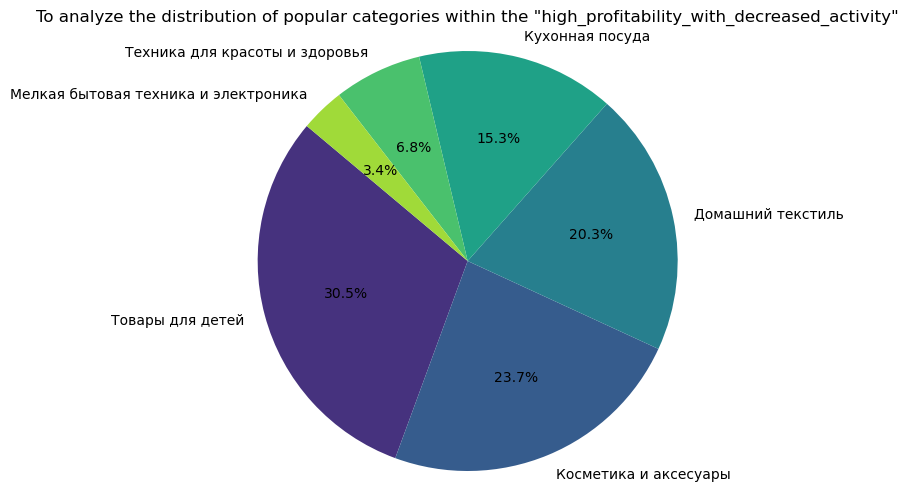

In [427]:
category_counts = goal_seg['популярная_категория'].value_counts()

# create pie chart 
plt.figure(figsize=(10, 6))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_counts)))
plt.title('To analyze the distribution of popular categories within the "high_profitability_with_decreased_activity"')
plt.axis('equal') 
plt.show()

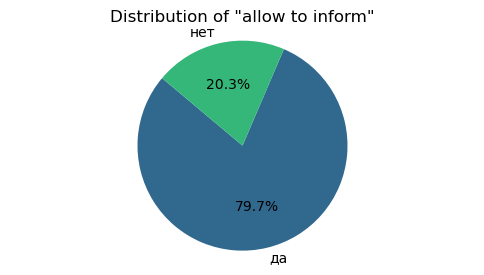

In [429]:
category_counts = goal_seg['разрешить_сообщать'].value_counts()

# Построение круговой диаграммы
plt.figure(figsize=(6, 3))
plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('viridis', len(category_counts)))
plt.title('Distribution of "allow to inform"')
plt.axis('equal')  # Убедиться, что круговая диаграмма круглая
plt.show()

**Personalized Recommendations**:

- We can see that the popular categories for the target segment are children's products, cosmetics and accessories, and kitchenware. These are the categories that should be the focus of the following campaigns:
  
  - **Discounts on these types of products**: The target segment has a higher average number of unpaid items in their cart over the last 3 months (4 compared to 2, nearly 50% higher). Offering discounts on these products could encourage them to complete their purchases.
  
  - **Improve marketing activity**: Increase efforts in calls and advertising, as the average marketing activity for this segment (3.5) is lower than that of the best-performing segment (4.5). Enhancing marketing engagement could help retain these customers.
  
  - **Launch promotional campaigns focused on these categories**: Since this segment tends to take advantage of promotions more frequently, targeted promotions in these categories could resonate well with them.

  - **Overall approach**: Customers in this segment are generally open to receiving information about offers. Therefore, focusing communication and marketing efforts on these specific categories could be particularly effective.

## Final conclusion

### Task

The task is to develop a solution that will allow the personalization of offers for regular customers to increase their purchasing activity.

### Initial Data and Preprocessing

The initial data consisted of four datasets related to customer behavior on the website, revenue data that the store receives from customers, data on the time (in minutes) that customers spent on the website over a period, and data on the average monthly profit from customers over the last 3 months.

The first three datasets were merged, data preprocessing was conducted, and a correlation analysis was performed.

### Search for the Best Model

To find the best model, a pipeline was created that included data preparation (encoding, scaling) and searching for the best model among kNN, Decision Tree Classifier, SVC, and Logistic Regression. Randomized search was used for hyperparameter tuning.

### Best Model

As a result of the tests, the best model was Logistic Regression, with a ROC_AUC metric of 0.9 on the test set, and 0.87 on validation.

### Conclusions and Additional Recommendations for the Target Customer Segment

The target segment chosen was high profitability with decreasing purchasing activity. An analytical and statistical analysis was conducted, leading to the following personalized recommendations:

- **Focus of marketing activity** should be on the following categories:
  - Children’s products, cosmetics and accessories, kitchenware.
  
- **Campaigns and promotions**:
  - Offer discounts on these products to reduce the number of unpaid items in the cart.
  
- **Increase marketing activity**:
  - Enhance calls and advertisements.
  
- **Promotions and offers**:
  - Launch promotional campaigns for these categories, as the segment shows high promotional activity.
  
- **Communication**:
  - Actively inform customers about offers, focusing on these categories.

These recommendations will help increase customer purchasing activity in the selected segment.